<a href="https://colab.research.google.com/github/abuelnasr0/OvR_sickit_learn/blob/main/OvR_sickit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess the dataset


## Download the dataset

In [ ]:
!wget https://archive.ics.uci.edu/static/public/236/seeds.zip

--2024-06-05 06:00:06--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

2024-06-05 06:00:06 (106 MB/s) - ‘seeds.zip’ saved [9432]



In [ ]:
!unzip /content/seeds.zip -d /content/

Archive:  /content/seeds.zip
 extracting: /content/seeds_dataset.txt  


## Convert the dataset into csv

In [ ]:
CSV_PATH = "/content/seeds.csv"
TXT_PATH = "/content/seeds_dataset.txt"

In [ ]:
features_names = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "y"]

def get_lines(txt_path):
  with open(txt_path, "r") as seeds_txt:
    for line in seeds_txt:
      yield line

def convert_into_csv(csv_path, txt_path, features_names):
  with open(csv_path, "w") as seeds_csv:
    seeds_csv.write(r",".join(features_names) + "\n")
  with open(csv_path, "a") as seeds_csv:
    for line in get_lines(txt_path):
      seeds_csv.write(
          ",".join(line.split())
      )
      seeds_csv.write(
          "\n"
      )

In [ ]:
convert_into_csv(CSV_PATH, TXT_PATH, features_names)

## Read the csv data as dataframe

In [ ]:
import pandas as pd

In [ ]:
seeds_df = pd.read_csv(CSV_PATH)

In [ ]:
seeds_df.head()

,x1,x2,x3,x4,x5,x6,x7,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
seeds_df.describe()

,x1,x2,x3,x4,x5,x6,x7,y
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Plot the data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [ ]:
# Color for each label
COLORS = ['r', 'y', 'g']

### Plot each feature VS labels

#### Features values and ranges

<Axes: >

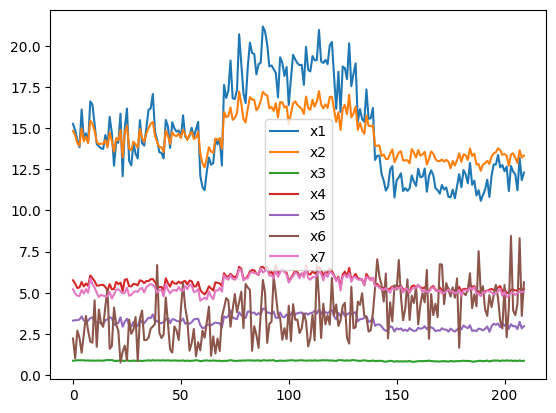

In [ ]:
seeds_df.iloc[:, :7].plot()

#### labels values and ranges

<Axes: >

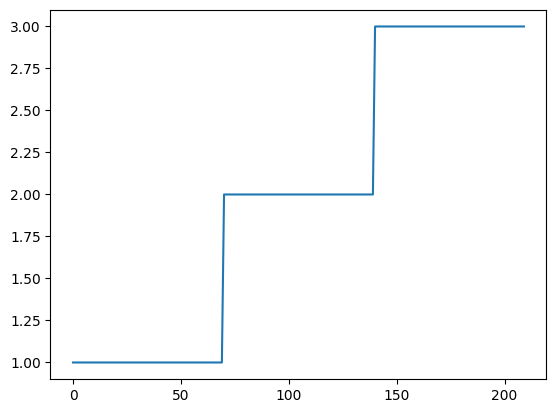

In [ ]:
seeds_df.iloc[:, 7].plot()

#### Density plots of the features

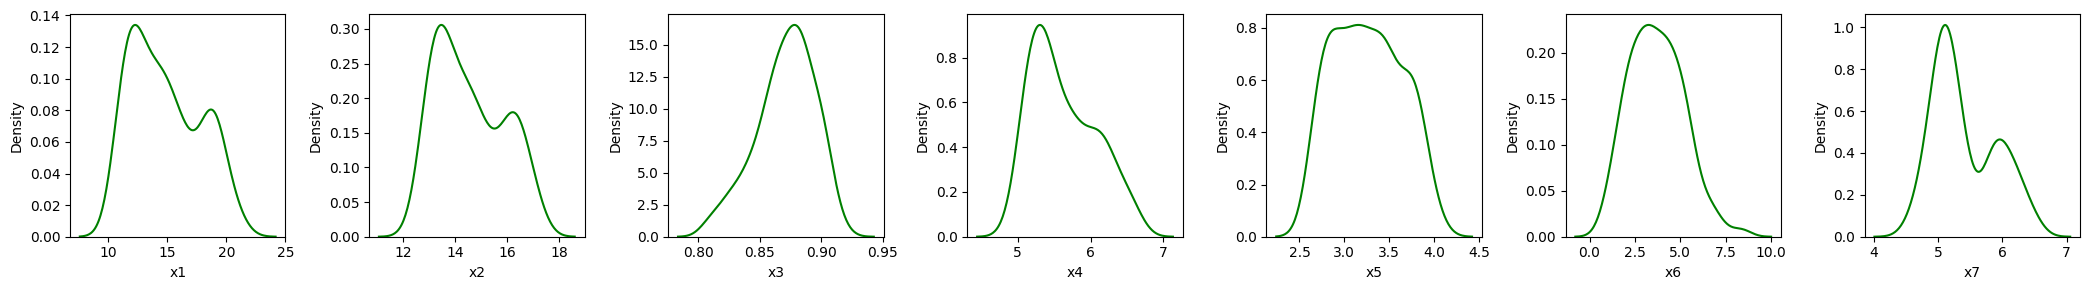

In [ ]:
# plt.density()
fig, axs = plt.subplots(1, 7, figsize=(21, 3), tight_layout=True)
for i in range(7):
  fig = sns.kdeplot( seeds_df.iloc[:,i], color='green', ax=axs[i])
  fig.set(xlabel=f"x{i+1}", ylabel="Density")

#### Boxplot of the features

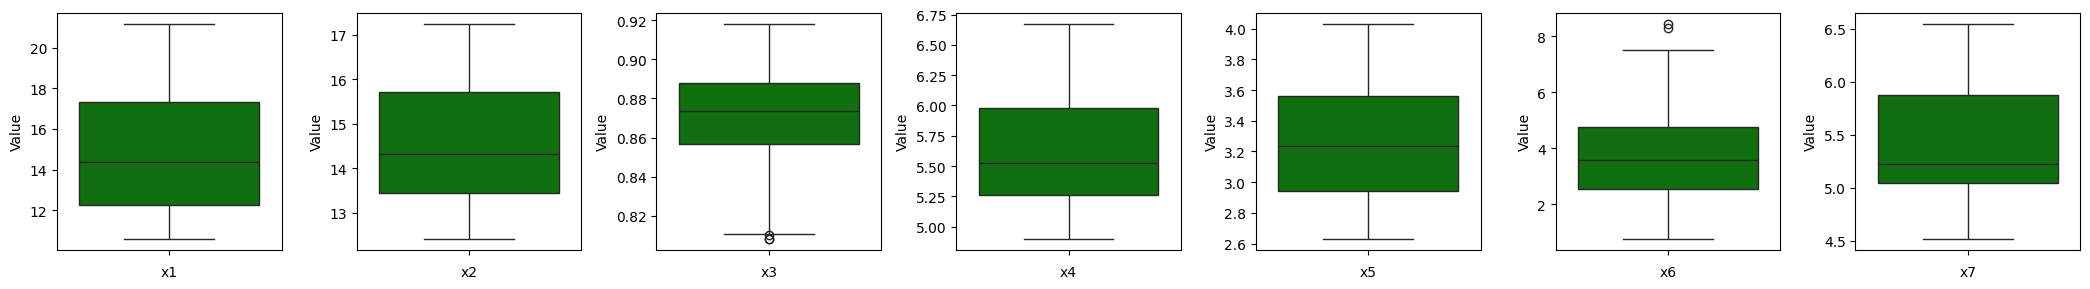

In [ ]:
fig, axs = plt.subplots(1, 7, figsize=(21, 3), tight_layout=True)
for i in range(7):
  fig = sns.boxplot( seeds_df.iloc[:,i], color='green', ax=axs[i])
  fig.set(xlabel=f"x{i+1}", ylabel="Value")

#### each feature Vs Labels

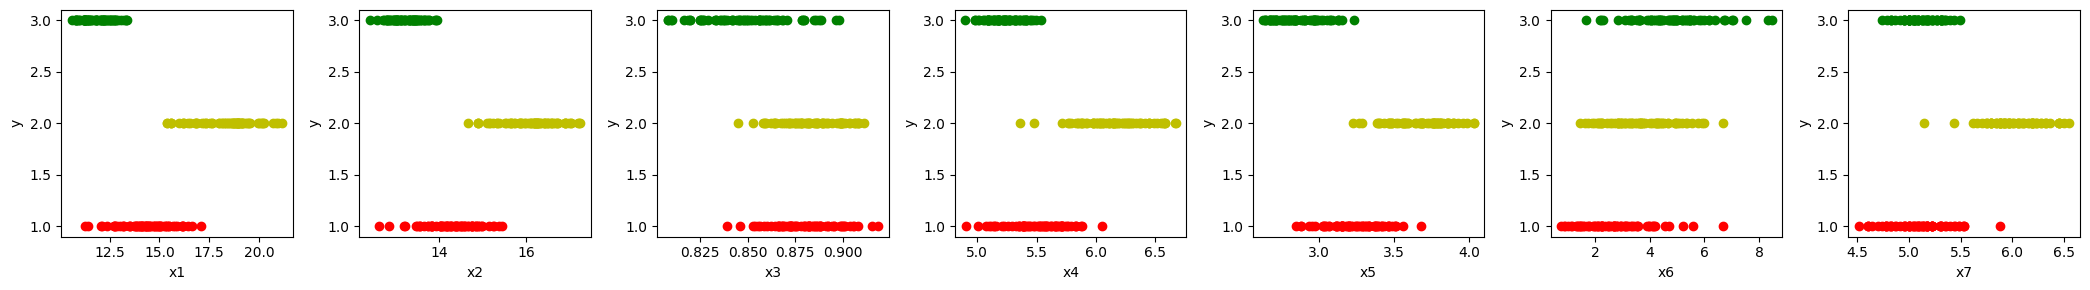

In [ ]:
# 7 plots
# 1 * 7
figure(figsize=(21, 3), tight_layout=True)
curr_plot = 1
for i in range(7):
  plt.subplot(1, 7, curr_plot)
  for k in range(1, 4):
    indexes = np.where(seeds_df.iloc[:, 7] == k)
    x = seeds_df.iloc[indexes[0], i]
    y = seeds_df.iloc[indexes[0], 7]
    plt.xlabel(f"x{i+1}")
    plt.ylabel(f"y")
    plt.scatter(x,y, c=COLORS[k-1])
  curr_plot+=1


#### combination of two feature Vs Labels

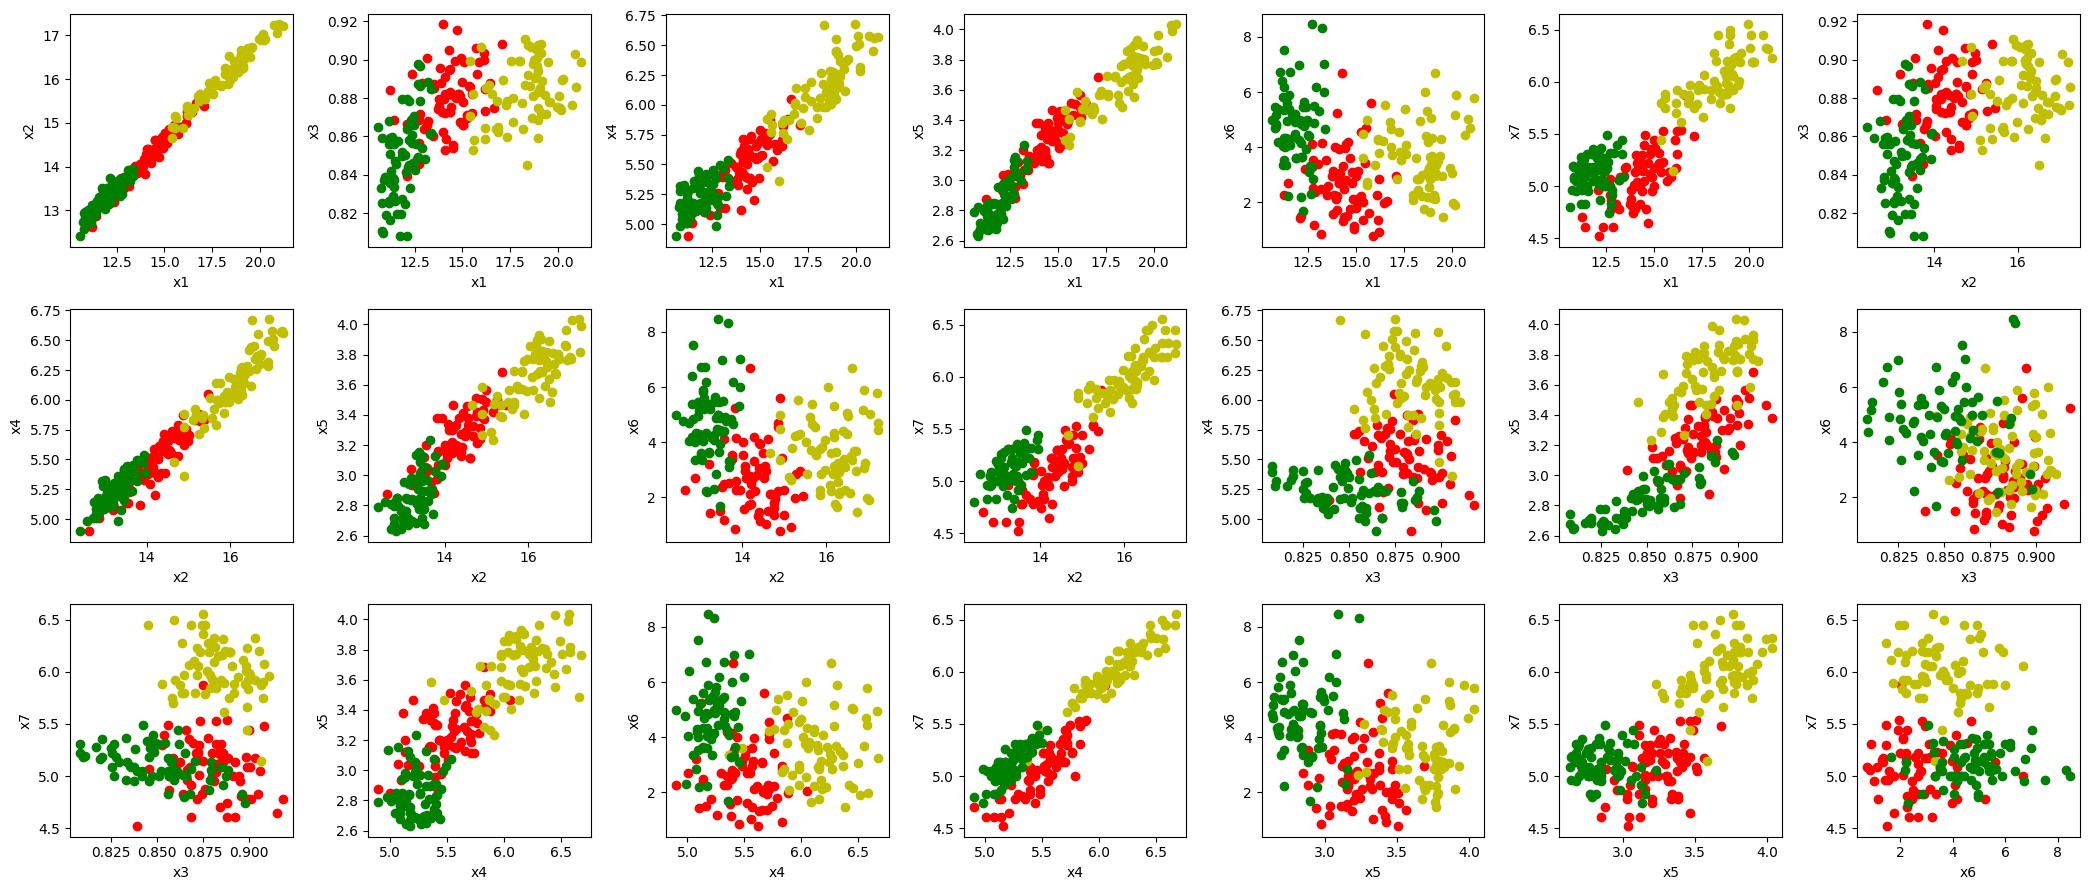

In [ ]:
# 21 plots
# 3 * 7 plot
figure(figsize=(21, 9), tight_layout=True)
curr_plot = 1
for i in range(7-1):
  for j in range(i+1, 7):
    plt.subplot(3, 7, curr_plot)
    for k in range(1, 4):
      indexes = np.where(seeds_df.iloc[:, 7] == k)
      x = seeds_df.iloc[indexes[0], i]
      y = seeds_df.iloc[indexes[0], j]
      plt.xlabel(f"x{i+1}")
      plt.ylabel(f"x{j+1}")
      plt.scatter(x, y, c=COLORS[k-1])
    curr_plot+=1

#### Boxplots of each feature vs labels

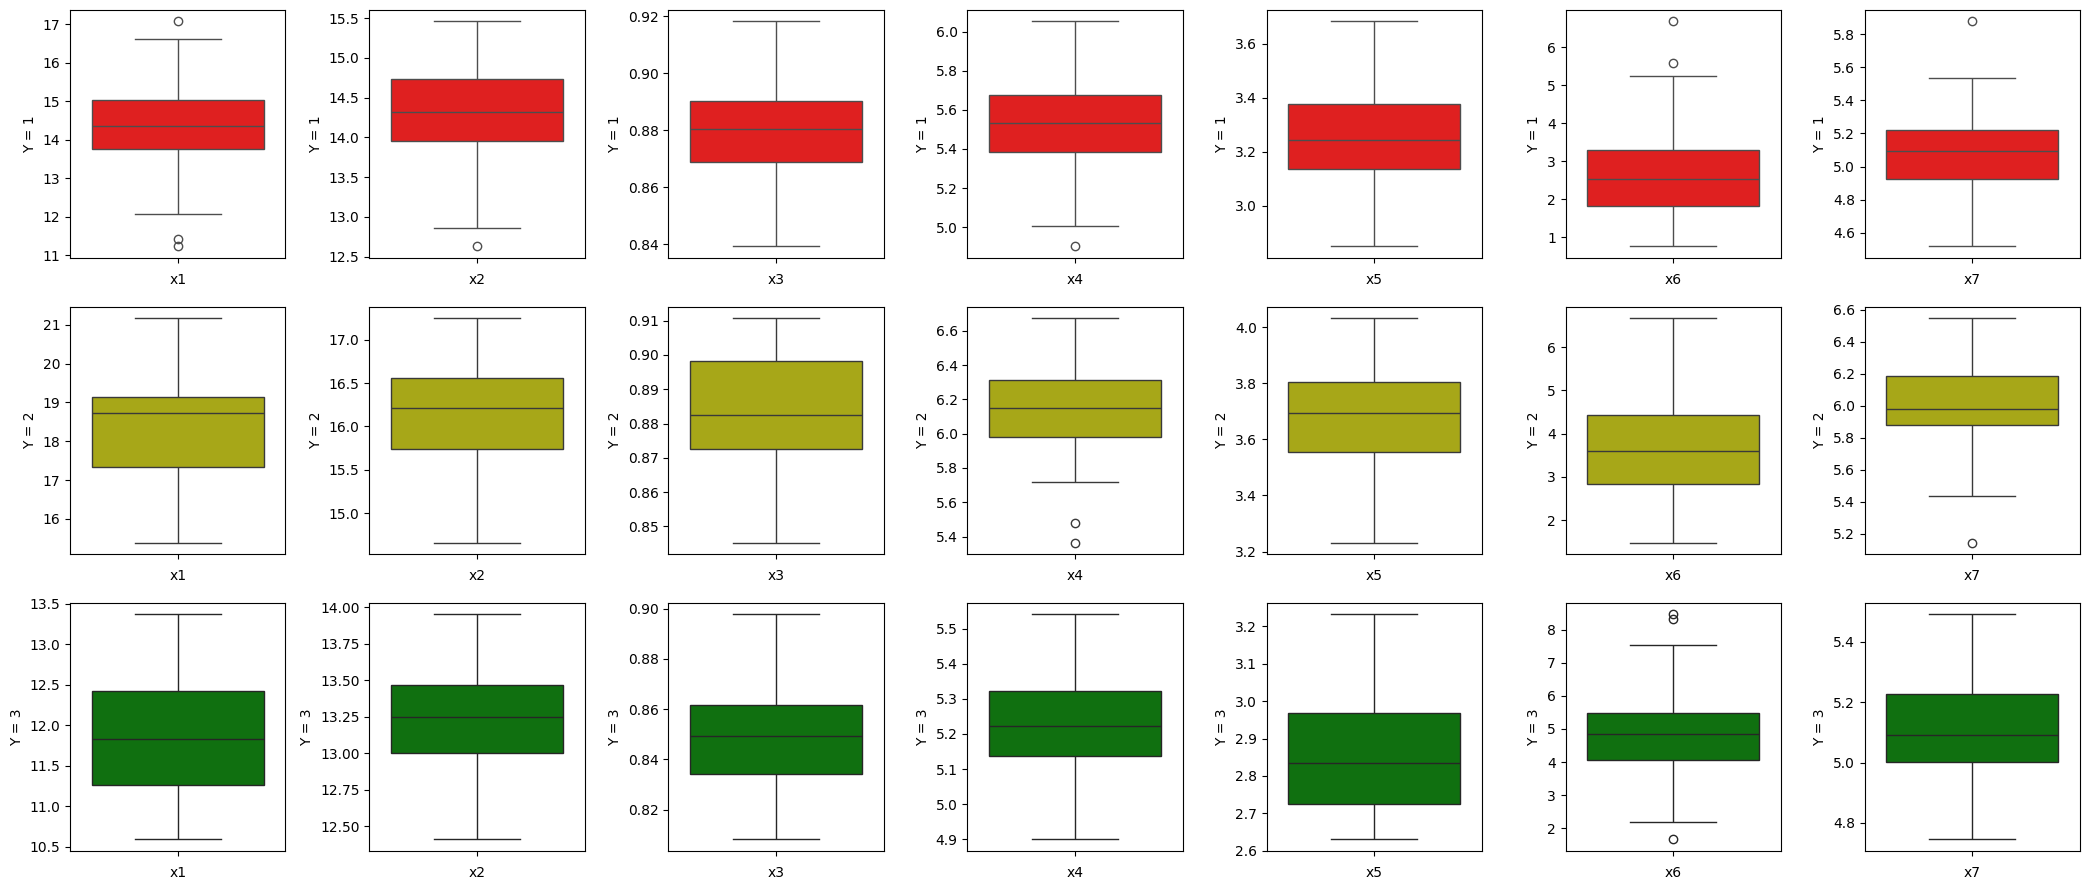

In [ ]:
fig, axs = plt.subplots(3, 7, figsize=(21, 9), tight_layout=True)
for k in range(1, 4):
  for i in range(7):
    indexes = np.where(seeds_df.iloc[:, 7] == k)
    fig = sns.boxplot( seeds_df.iloc[list(indexes[0]), i], color=COLORS[k-1], ax=axs[k-1, i])
    fig.set(xlabel=f"x{i+1}", ylabel=f"Y = {k}")

<Axes: >

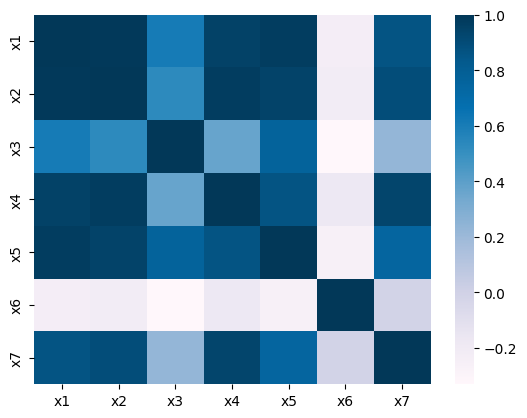

In [ ]:
corr = seeds_df.iloc[:, :7].corr()
sns.heatmap(corr, cmap='PuBu')

### Normalize the dataset

In [ ]:
from sklearn import preprocessing

#### Normalize and convert to numpy array ( both features and labels )

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(seeds_df.iloc[:, :7])
scaled_seed_data = scaler.transform(seeds_df.iloc[:, :7])
scaled_seed_data.shape

(210, 7)

In [ ]:
seed_labels = np.array(seeds_df.iloc[:, 7])
seed_labels.shape

(210,)

# solve first requirement
Form 2 class-Seeds dataset by removing first class (Kama), compare performance of Perceptron and SVM
on testing set. Provide accuracies, confusion matrix for both model and make commnets on the
performance.

#### Remove the first class (1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def remove_class(features, labels, cls=1):
  mask = labels != cls
  indexes = np.where(mask)
  return features[indexes[0], ...], labels[indexes[0], ...]-2

In [ ]:
two_classes_features, two_classes_labels = remove_class(scaled_seed_data, seed_labels)
print(f"Features shape = {two_classes_features.shape}, labels shape = {two_classes_labels.shape}")

Features shape = (140, 7), labels shape = (140,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(two_classes_features, two_classes_labels, test_size=0.20)
print(f"Train Features shape = {X_train.shape}, Train labels shape = {y_train.shape}")
print(f"Test Features shape = {X_test.shape}, Test labels shape = {y_test.shape}")

Train Features shape = (112, 7), Train labels shape = (112,)
Test Features shape = (28, 7), Test labels shape = (28,)


## Train Perceptron

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#### Results of perceptron on training on the whole features

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
perceptron_model = Perceptron(max_iter=50, tol = 1e-03)
perceptron_model.fit(X_train, y_train)

# Train accuracy
train_score = perceptron_model.score(X_train, y_train)

# Test accuracy
test_score = perceptron_model.score(X_test, y_test)

#confusion_matrix
test_pred = perceptron_model.predict(X_test)
my_convusion_matrix = confusion_matrix(test_pred, y_test)

##### Accuracies

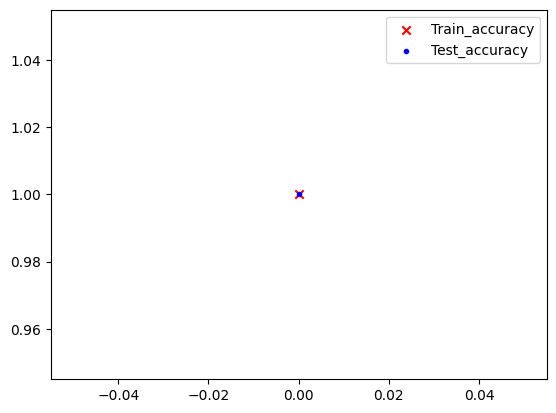

In [ ]:
plt.scatter(0, train_score, marker='x', c="r", label="Train_accuracy")
plt.scatter(0, test_score, marker='.', c="b", label="Test_accuracy")
plt.legend()
plt.show()

##### Confusion matrix

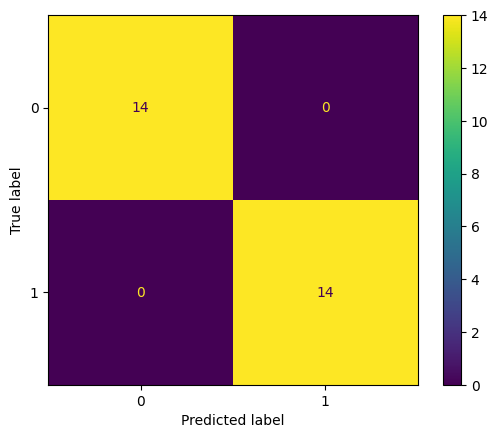

In [ ]:
disp = ConfusionMatrixDisplay(my_convusion_matrix)
disp.plot()

### Results of perceptron of training on combination of two features

##### Training

In [ ]:
# Train data in combinations of two features

# Build confusion matrix to display
confusion_matrixes = [[0 for _ in range(7)] for _ in range(7)]

#get list of accuracies
train_accuracies = [[0 for _ in range(7)] for _ in range(7)]
test_accuracies = [[0 for _ in range(7)] for _ in range(7)]

for i in range(7):
  for j in range(i+1, 7):
    perceptron_model = Perceptron(max_iter=50, tol = 1e-03)
    perceptron_model.fit(X_train[:, [i, j]], y_train)
    # confusion matrix
    test_pred = perceptron_model.predict(X_test[:, [i, j]])
    confusion_matrixes[i][j] = confusion_matrix(test_pred, y_test)
    # Get accuracies
    train_score = perceptron_model.score(X_train[:, [i, j]], y_train)
    test_score = perceptron_model.score(X_test[:, [i, j]], y_test)
    # accuracies
    train_accuracies[i][j] = train_score
    test_accuracies[i][j] = test_score



##### Accuracies

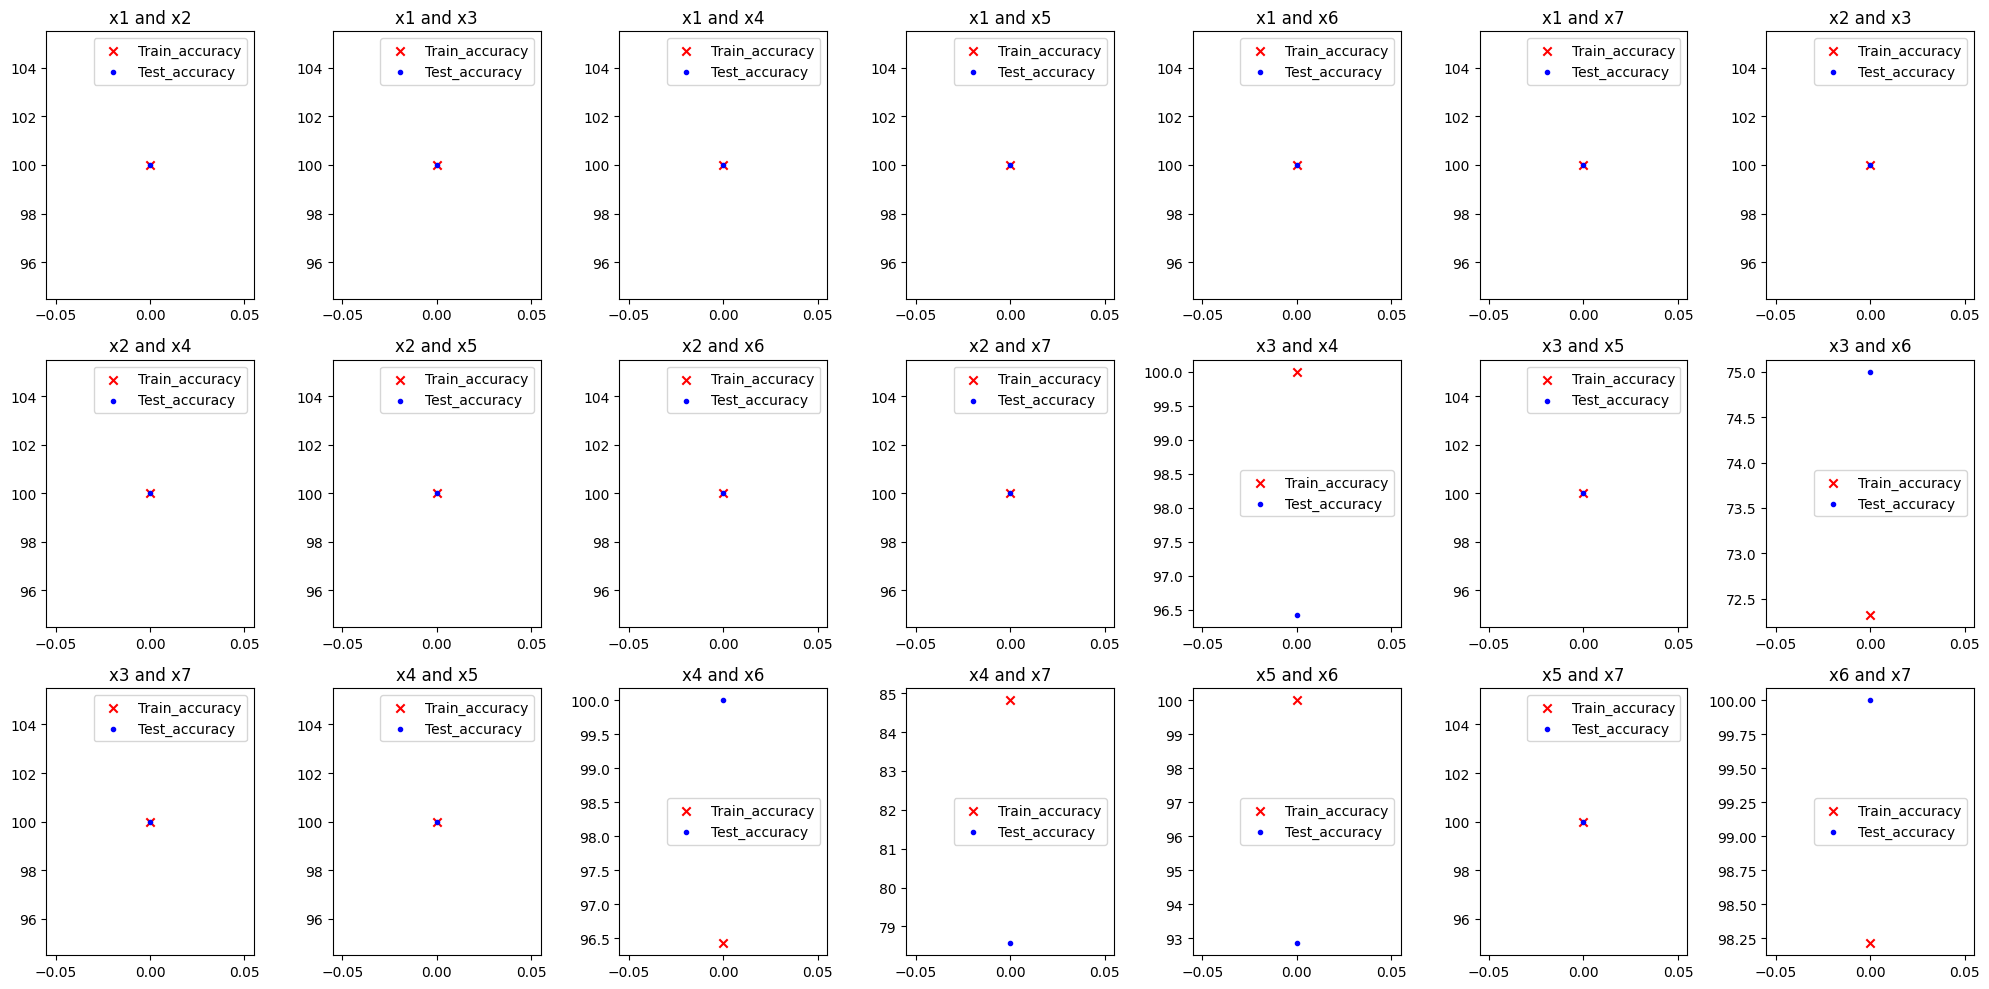

In [ ]:
curr_plot = 0
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20,10),  tight_layout=True)
axes = axes.flatten()
for i in range(7):
  for j in range(i+1, 7):
    axes[curr_plot].scatter(0, train_accuracies[i][j]*100, marker='x', c="r", label="Train_accuracy")
    axes[curr_plot].scatter(0, test_accuracies[i][j]*100, marker='.', c="b", label="Test_accuracy")
    axes[curr_plot].legend()
    axes[curr_plot].title.set_text(f"x{i+1} and x{j+1}")
    curr_plot +=1

##### Confusion Matrix

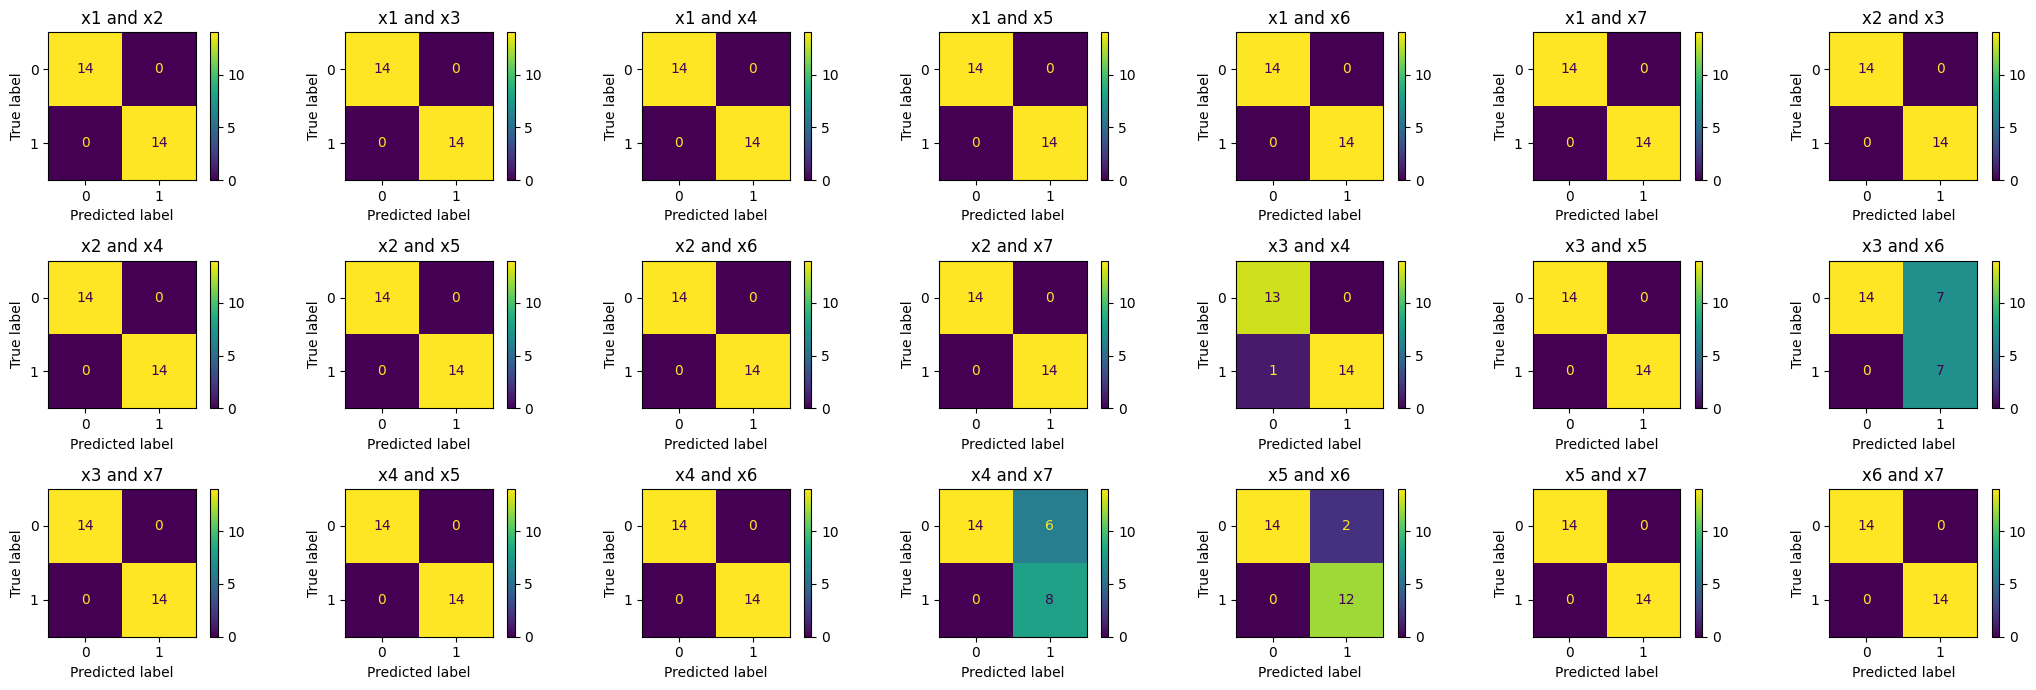

In [ ]:
curr_plot = 0
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(21,7),  tight_layout=True)
axes = axes.flatten()
for i in range(7):
  for j in range(i+1, 7):
    disp = ConfusionMatrixDisplay(confusion_matrixes[i][j])
    disp.plot(ax=axes[curr_plot])
    axes[curr_plot].title.set_text(f"x{i+1} and x{j+1}")
    curr_plot +=1


## Train SVM

#### Results of training SVM on the whole dataset

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_model = LinearSVC(max_iter=50)
svm_model.fit(X_train, y_train)

# Train accuracy
train_score = svm_model.score(X_train, y_train)

# Test accuracy
test_score = svm_model.score(X_test, y_test)

#confusion_matrix
test_pred = svm_model.predict(X_test)
my_convusion_matrix = confusion_matrix(test_pred, y_test)

#### Accuracies

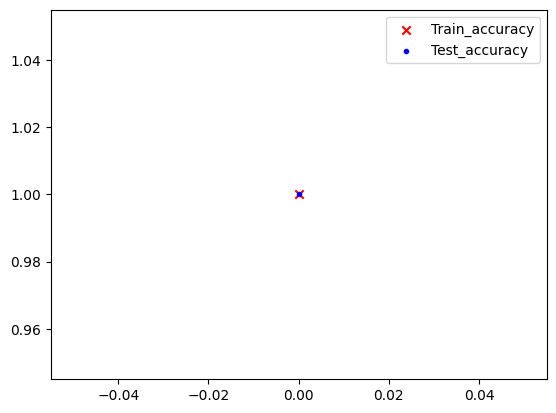

In [ ]:
plt.scatter(0, train_score, marker='x', c="r", label="Train_accuracy")
plt.scatter(0, test_score, marker='.', c="b", label="Test_accuracy")
plt.legend()
plt.show()

#### Confusion matrix

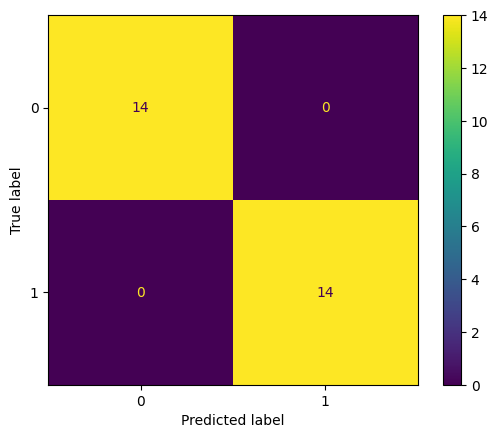

In [ ]:
disp = ConfusionMatrixDisplay(my_convusion_matrix)
disp.plot()

### Results of perceptron of training on combination of two features

##### Training

In [ ]:
# Train data in combinations of two features

# Build confusion matrix to display
confusion_matrixes = [[0 for _ in range(7)] for _ in range(7)]

#get list of accuracies
train_accuracies = [[0 for _ in range(7)] for _ in range(7)]
test_accuracies = [[0 for _ in range(7)] for _ in range(7)]

for i in range(7):
  for j in range(i+1, 7):
    svm_model = LinearSVC(max_iter=150)
    svm_model.fit(X_train[:, [i, j]], y_train)
    # confusion matrix
    test_pred = svm_model.predict(X_test[:, [i, j]])
    confusion_matrixes[i][j] = confusion_matrix(test_pred, y_test)
    # Get accuracies
    train_score = svm_model.score(X_train[:, [i, j]], y_train)
    test_score = svm_model.score(X_test[:, [i, j]], y_test)
    # accuracies
    train_accuracies[i][j] = train_score
    test_accuracies[i][j] = test_score



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


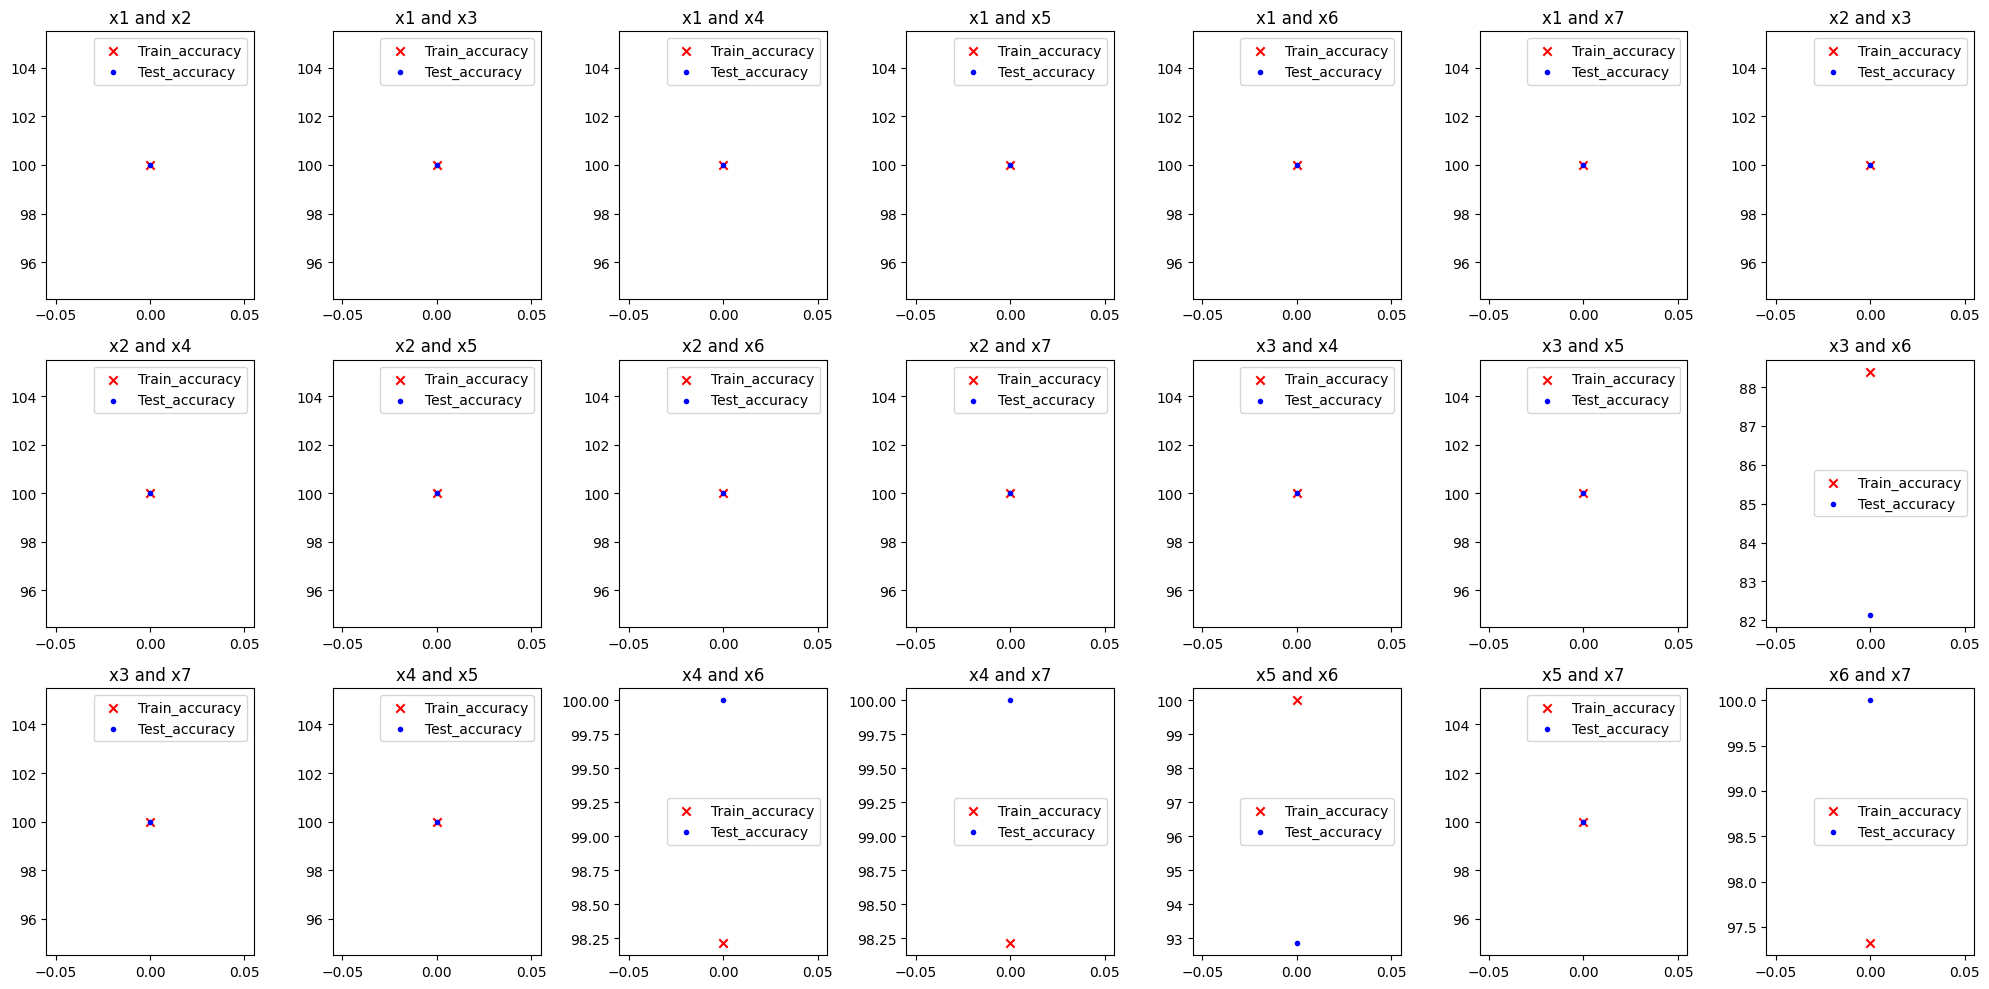

In [ ]:
curr_plot = 0
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20,10),  tight_layout=True)
axes = axes.flatten()
for i in range(7):
  for j in range(i+1, 7):
    axes[curr_plot].scatter(0, train_accuracies[i][j]*100, marker='x', c="r", label="Train_accuracy")
    axes[curr_plot].scatter(0, test_accuracies[i][j]*100, marker='.', c="b", label="Test_accuracy")
    axes[curr_plot].legend()
    axes[curr_plot].title.set_text(f"x{i+1} and x{j+1}")
    curr_plot +=1

##### Confusion Matrix

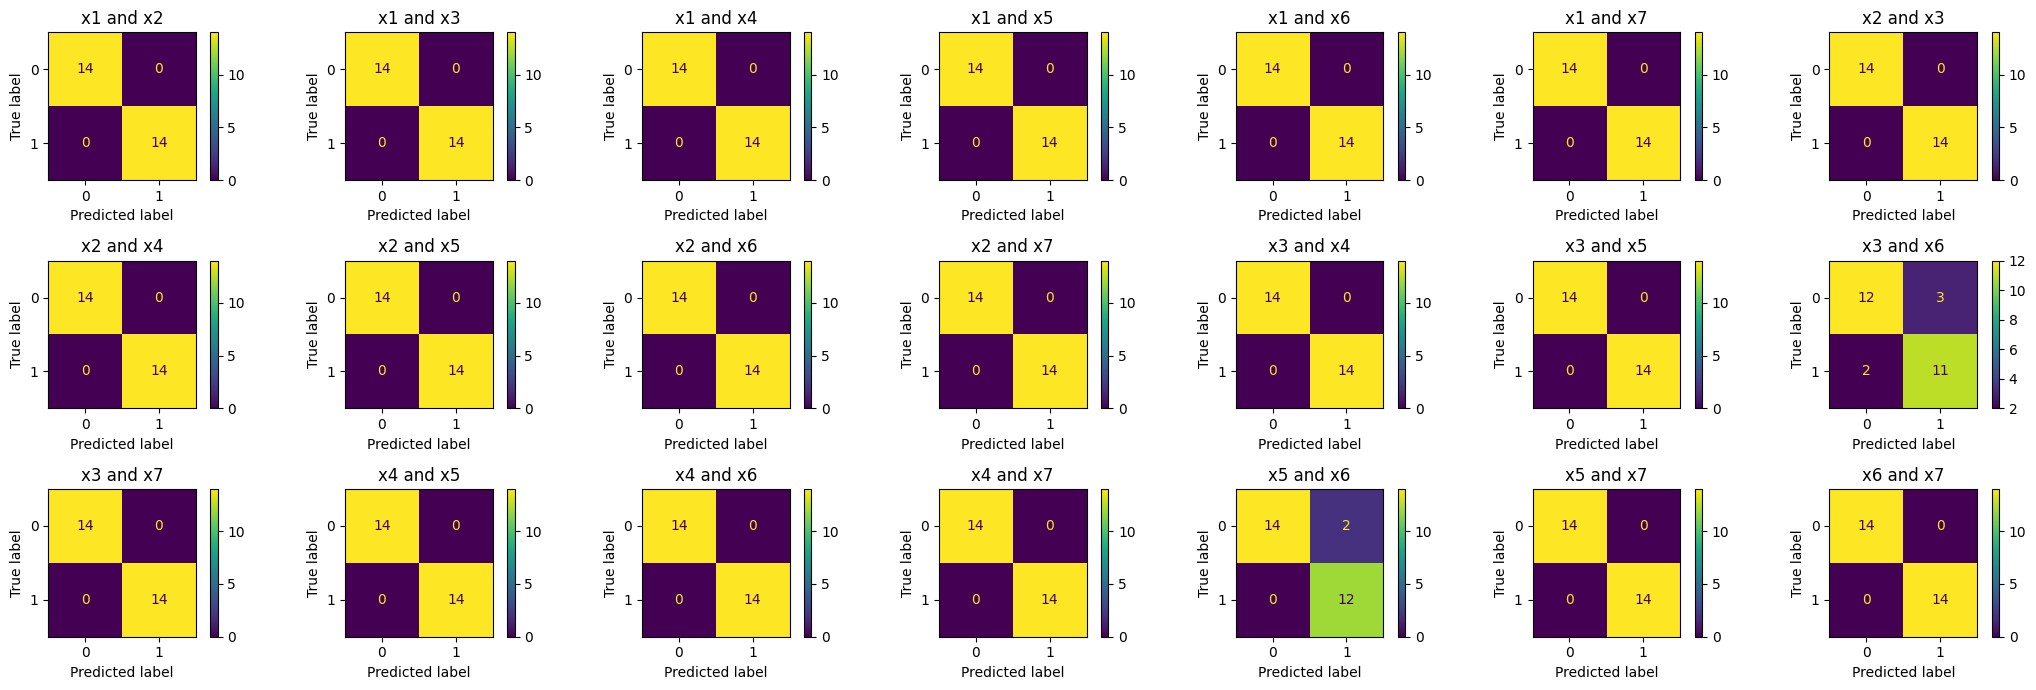

In [ ]:
curr_plot = 0
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(21,7),  tight_layout=True)
axes = axes.flatten()
for i in range(7):
  for j in range(i+1, 7):
    disp = ConfusionMatrixDisplay(confusion_matrixes[i][j])
    disp.plot(ax=axes[curr_plot])
    axes[curr_plot].title.set_text(f"x{i+1} and x{j+1}")
    curr_plot +=1


# solve second requirement
Build OvR-Perceptron and OvR-SVM and test on Seeds testing dataset (which contains 3 classes)

In [ ]:
from copy import deepcopy

In [ ]:
class OvRSeedsPerceptron:
  def __init__(self, seeds_df_all, model_cls, model_kwargs={}, features=None):
    if features != None:
      x,y = features
      seeds_df = seeds_df_all.iloc[:, [x-1,y-1,-1]]
      self.names = [f"x{x}",f"x{y}"]
    else:
      seeds_df = seeds_df_all
    self.num_classes = 3
    self.seeds_df = seeds_df
    self.seeds_df_train, self.seeds_df_test = self._split_seeds_df(self.seeds_df)

    self.models = [
        model_cls(
            **model_kwargs
        )
        for i in range(self.num_classes)
    ]
    self.binarized_seeds_train, self.binarized_seeds_test = self._binarized_dataframes(
        self.seeds_df_train,
        self.seeds_df_test
      )

  @staticmethod
  def _binarize(data_frame, true_label):
    mask = data_frame.iloc[:, -1] == true_label
    new_labels = np.where(
        mask,
        1,
        0
    )

    new_data_frame = deepcopy(data_frame)
    new_data_frame.iloc[:, -1]  = new_labels
    return new_data_frame

  def _binarized_dataframes(self, seeds_train, seeds_test):
    binarized_seeds_train = []
    binarized_seeds_test = []
    for i in range(1, 4):
      binarized_seeds_train.append(
          self._binarize(seeds_train, i)
      )
      binarized_seeds_test.append(
          self._binarize(seeds_test, i)
      )
    return binarized_seeds_train, binarized_seeds_test

  def _split_seeds_df(self, seeds_df):
    train, test = train_test_split(
          self.seeds_df,
          test_size=0.10
      )
    return train, test

  def fit(self):
    for i in range(self.num_classes):
      self.models[i].fit(
          self.binarized_seeds_train[i].iloc[:,:-1],
          self.binarized_seeds_train[i].iloc[:,-1],
      )

  def predict(self, features):
    """
    Args:
      features: np.ndarray or pandas.DataFrame of size(n, 7)
    """
    predictions = []
    for i in range(self.num_classes):
      p = self.models[i].predict(
          features
      )
      predictions.append(p)
    # num_inputs * 3
    np_predictions = np.array(predictions)
    return np.argmax(np_predictions, axis=0)



  def _get_scores(self, binarized_seeds):
    scores = []
    for i in range(self.num_classes):
      score = self.models[i].score(
          binarized_seeds[i].iloc[:,:-1],
          binarized_seeds[i].iloc[:,-1],
      )
      scores.append(score)
    return scores

  def plot_ovr_accuracy(self):
    y_pred_train = self.predict(self.seeds_df_train.iloc[:,:-1])
    y_pred_test = self.predict(self.seeds_df_test.iloc[:,:-1])

    y_true_train = self.seeds_df_train.iloc[:,-1]-1
    y_true_test = self.seeds_df_test.iloc[:,-1]-1

    train_acc = accuracy_score(y_true_train, y_pred_train)
    test_acc = accuracy_score(y_true_test, y_pred_test)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3),  tight_layout=True)

    axes.scatter(0, train_acc*100, marker='x', c="r", label="Train_accuracy")
    axes.scatter(0, test_acc*100, marker='.', c="b", label="Test_accuracy")
    axes.legend()
    axes.title.set_text(f"model accuracy")

  def plot_accuracies(self):
    """
    Must be called after fit()
    """
    train_accuracies = self._get_scores(
        self.binarized_seeds_train
    )
    test_accuracies = self._get_scores(
        self.binarized_seeds_test
    )
    curr_plot = 0
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3),  tight_layout=True)
    axes = axes.flatten()

    for i in range(self.num_classes):
      axes[curr_plot].scatter(0, train_accuracies[i]*100, marker='x', c="r", label="Train_accuracy")
      axes[curr_plot].scatter(0, test_accuracies[i]*100, marker='.', c="b", label="Test_accuracy")
      axes[curr_plot].legend()
      axes[curr_plot].title.set_text(f"model {i} accuracy")
      curr_plot +=1



  def plot_ovr_confusion_matrix(self):
    """
    A plot for the whole model
    """

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,3),  tight_layout=True)
    axes = axes.flatten()

    # train confusion matrix
    y_true = self.seeds_df_train.iloc[:,-1]-1
    y_pred = self.predict(self.seeds_df_train.iloc[:,:-1])
    my_confusion_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(my_confusion_matrix)
    disp.plot(ax=axes[0])
    axes[0].title.set_text(f"Training data confusion matrix")

    # test confusion matrix
    y_true = self.seeds_df_test.iloc[:, -1]-1
    y_pred = self.predict(self.seeds_df_test.iloc[:,:-1])
    my_confusion_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(my_confusion_matrix)
    disp.plot(ax=axes[1])
    axes[1].title.set_text(f"testing data confusion matrix")



  def plot_confusion_matrix(self):
    """
    Must be called after fit()
    """

    curr_plot = 0
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9,6),  tight_layout=True)
    axes = axes.flatten()

    for i in range(self.num_classes):
      test_pred = self.models[i].predict(self.binarized_seeds_test[i].iloc[:,:-1])
      my_confusion_matrix = confusion_matrix(self.binarized_seeds_test[i].iloc[:,-1], test_pred)
      disp = ConfusionMatrixDisplay(my_confusion_matrix)
      disp.plot(ax=axes[curr_plot])
      axes[curr_plot].title.set_text(f"Model {i} on test data")
      curr_plot +=1

    for i in range(self.num_classes):
      test_pred = self.models[i].predict(self.binarized_seeds_train[i].iloc[:,:-1])
      my_confusion_matrix = confusion_matrix(self.binarized_seeds_train[i].iloc[:,-1], test_pred)
      disp = ConfusionMatrixDisplay(my_confusion_matrix)
      disp.plot(ax=axes[curr_plot])
      axes[curr_plot].title.set_text(f"Model {i} on train data")
      curr_plot +=1


  def _plot_decision_boundary_with_data(self, data, title):

    curr_plot = 0
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3),  tight_layout=True,)
    fig.suptitle(f"{title} decision boundary", fontsize=16)
    axes = axes.flatten()

    # Decision boundary on train set
    for i in range(self.num_classes):
      axes[curr_plot].set_title(f"model {i}")
      # Countor
      x1 = data[i].iloc[:, 0]
      x2 = data[i].iloc[:, 1]
      x1_min, x1_max = np.min(x1), np.max(x1)
      x2_min, x2_max = np.min(x2), np.max(x2)

      x1_min = x1_min*0.97
      x2_min = x2_min*0.97

      x1_max = x1_max*1.03
      x2_max = x2_max*1.03


      xx1_range = np.arange(x1_min, x1_max, (x1_max-x1_min)*0.02)
      xx2_range = np.arange(x2_min, x2_max,(x2_max-x2_min)*0.02)
      xx1, xx2 = np.meshgrid(xx1_range, xx2_range)

      r1, r2 = xx1.flatten(), xx2.flatten()
      r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
      df = pd.DataFrame(
          data = np.hstack([r1, r2]),
          columns=self.names
      )

      Z = self.models[i].predict(df)
      Z = Z.reshape(xx1.shape)

      axes[curr_plot].contourf(
          xx1,
          xx2,
          Z,
      )

      # Scatter
      mask = data[i].iloc[:, -1] == 1
      indexes_1 = np.where(mask)
      indexes_2 = np.where(~mask)

      axes[curr_plot].scatter(
          data[i].iloc[indexes_1[0], 0],
          data[i].iloc[indexes_1[0], 1],

          marker='.', c="r", label="0"
      )
      axes[curr_plot].scatter(
          data[i].iloc[indexes_2[0], 0],
          data[i].iloc[indexes_2[0], 1],

          marker='.', c="b", label="1"
      )
      curr_plot +=1

  def plot_decision_boundary(self):
    if(self.seeds_df.shape[1] > 3 or self.seeds_df.shape[1] < 3):
      raise ValueError(
          "decision boundry can be plotted for only two features"
      )
    self._plot_decision_boundary_with_data(self.binarized_seeds_train, "train")
    self._plot_decision_boundary_with_data(self.binarized_seeds_test, "test")

#### Apply OvR-Perceptron

In [ ]:
percep = OvRSeedsPerceptron(
    seeds_df,
    Perceptron,
     {
        "max_iter": 50,
        "tol": 1e-03
     },
)

In [ ]:
percep.fit()

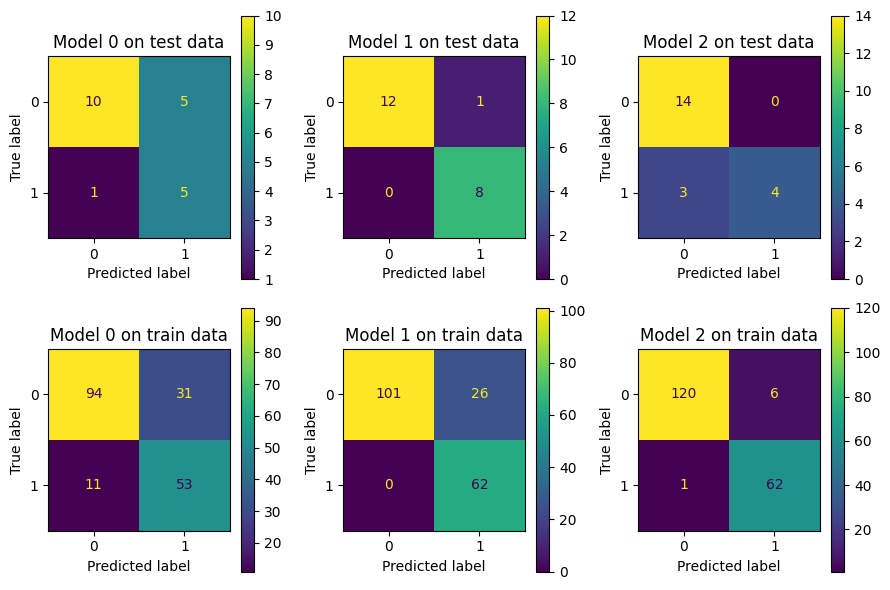

In [ ]:
percep.plot_confusion_matrix()

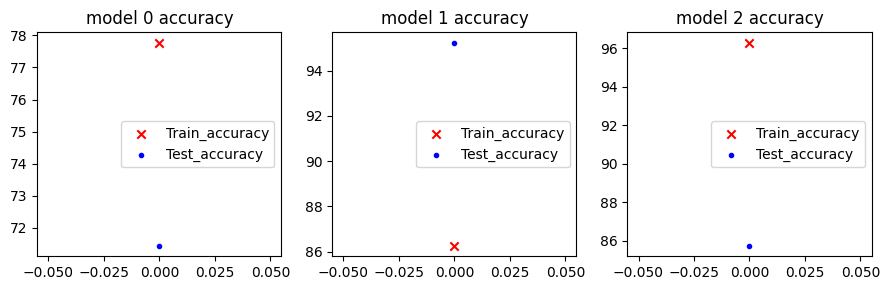

In [ ]:
percep.plot_accuracies()

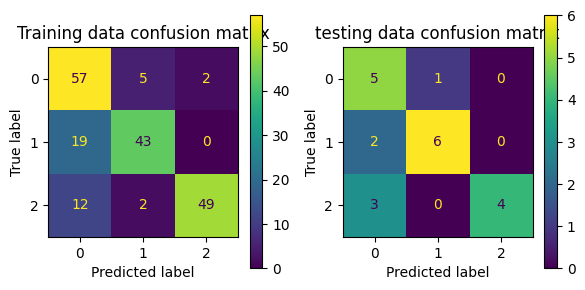

In [ ]:
percep.plot_ovr_confusion_matrix()

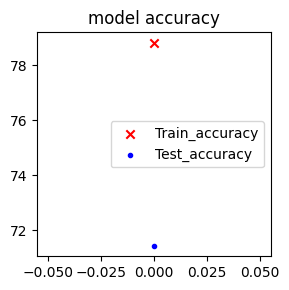

In [ ]:
percep.plot_ovr_accuracy()

#### Apply OvR-SVM

In [ ]:
svm = OvRSeedsPerceptron(
    seeds_df,
    LinearSVC,
     {
        "max_iter": 100000
     }
)
# SVM needs tooooooo much iterations

In [ ]:
svm.fit()

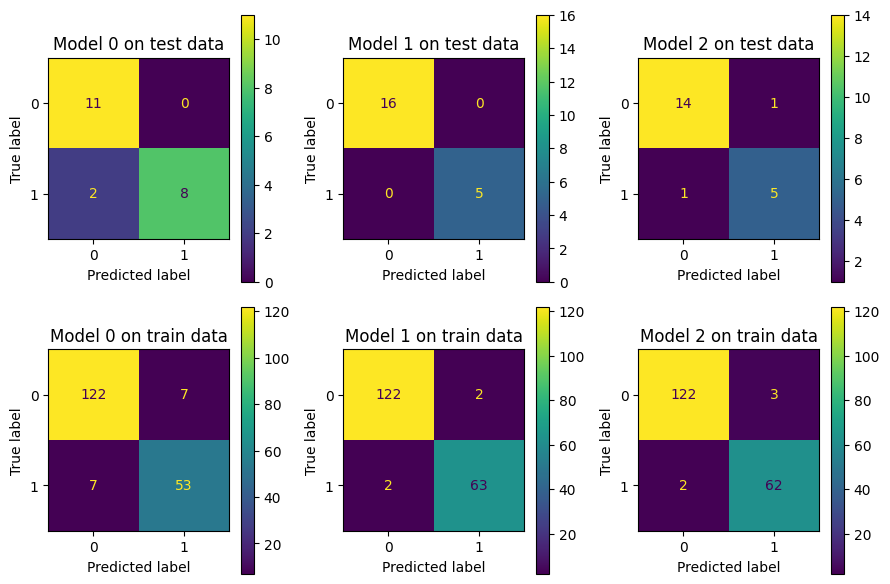

In [ ]:
svm.plot_confusion_matrix()

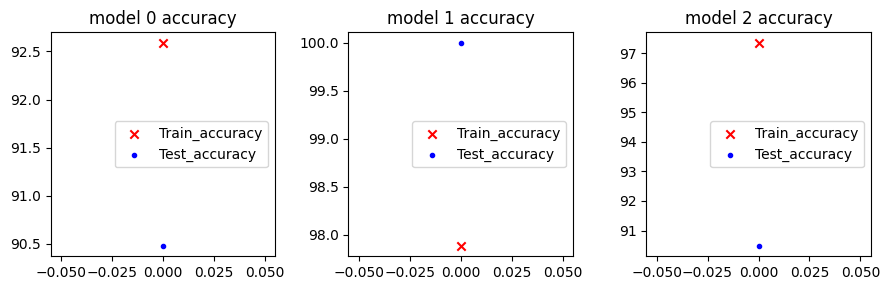

In [ ]:
svm.plot_accuracies()

#### Two labels prediction SVM

In [ ]:
svm_two = OvRSeedsPerceptron(
    seeds_df,
    LinearSVC,
     {
        "max_iter": 100000
     },
    features=(4, 5)
)

In [ ]:
svm_two.fit()

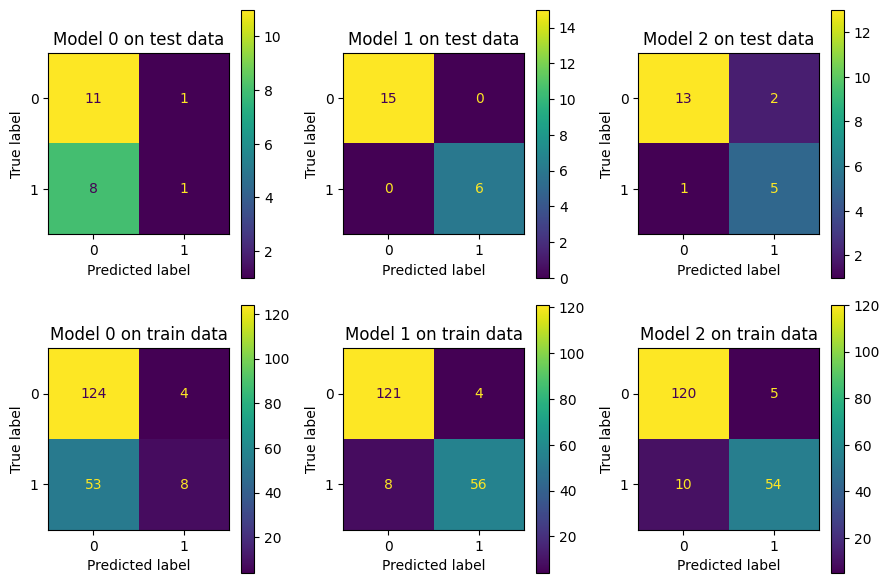

In [ ]:
svm_two.plot_confusion_matrix()

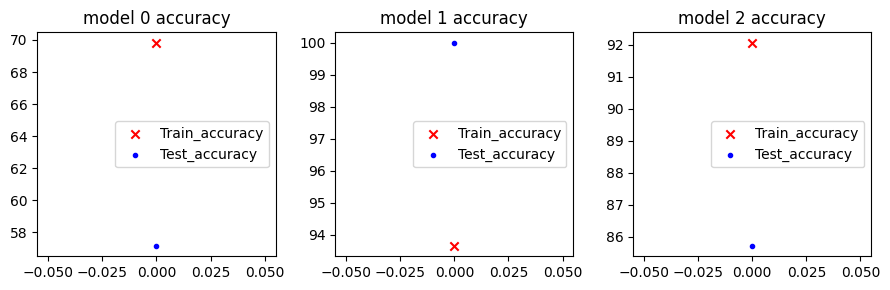

In [ ]:
svm_two.plot_accuracies()

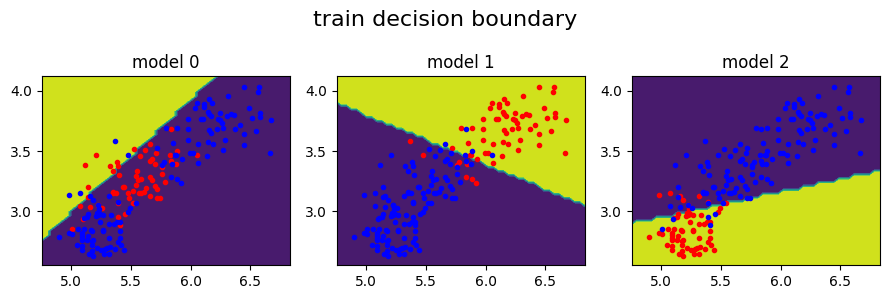

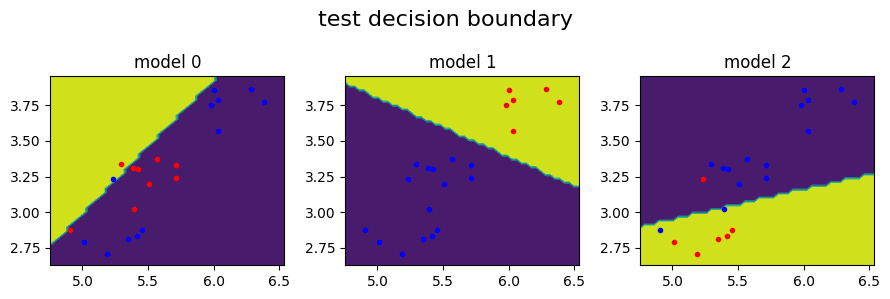

In [ ]:
svm_two.plot_decision_boundary()

#### Two labels prediction Perceptron

In [ ]:
percep_two = OvRSeedsPerceptron(
    seeds_df,
    Perceptron,
     {
        "max_iter": 50,
        "tol": 1e-03
     },
    features=(1, 5)
)

In [ ]:
percep_two.fit()

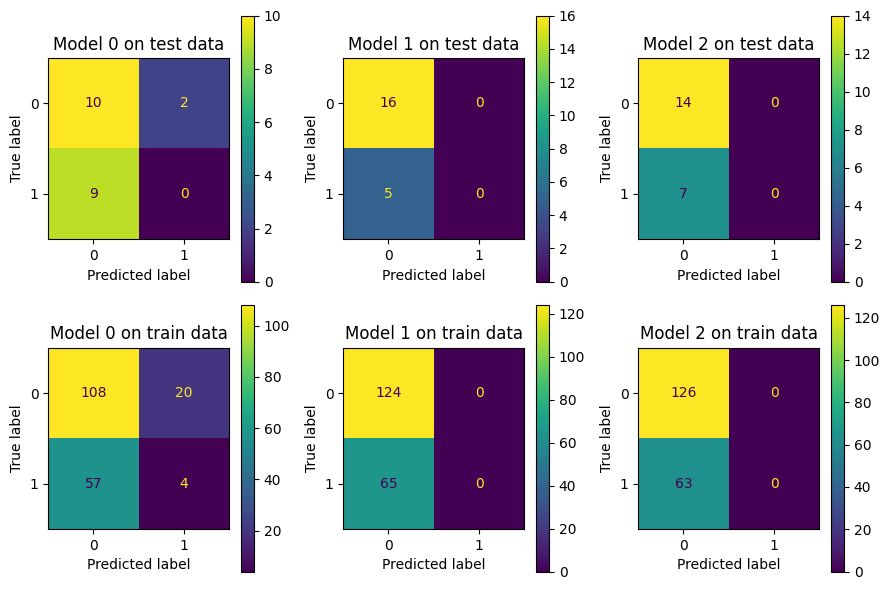

In [ ]:
percep_two.plot_confusion_matrix()

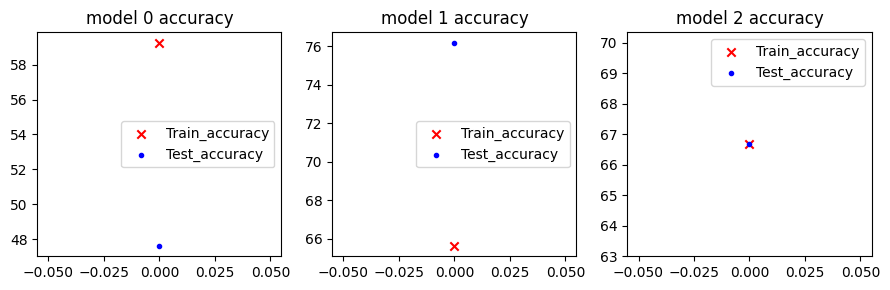

In [ ]:
percep_two.plot_accuracies()

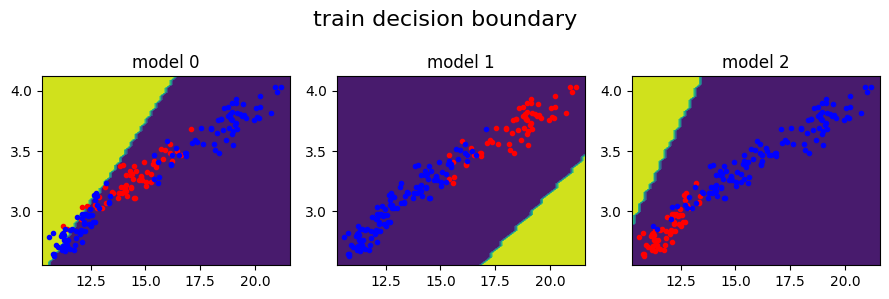

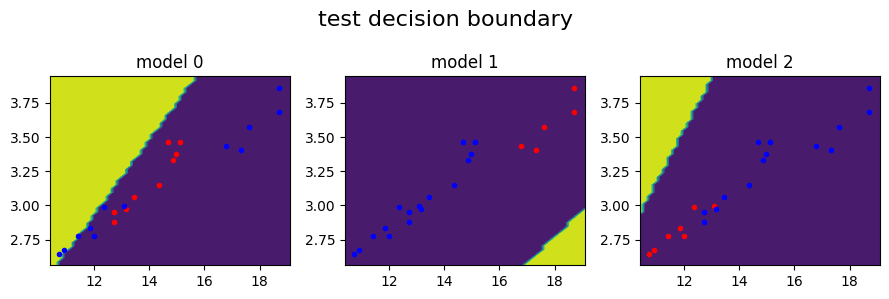

In [ ]:
percep_two.plot_decision_boundary()